# Simon Benninga's Financial Modeling, 4th edition
## Part II: Portfolio Models
### Chapter 8: Portfolio Models - Introduction
#### 8.2: Computing Returns for Apple (AAPL) and Google (GOOG)

In [138]:
#import libraries pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
#import csv file into a DataFrame
df_prices = pd.read_csv("Pages_198_199.csv")

In [140]:
#print head
df_prices.head()

,Date,AAPL,Google
0,1-Jun-07,122.04,580.11
1,2-Jul-07,131.76,645.90
2,1-Aug-07,138.48,599.39
3,4-Sep-07,153.47,592.64
4,1-Oct-07,189.95,515.04


In [141]:
#add daily returns columns
df_prices['Return_AAPL'] = np.log(df_prices['AAPL'] / df_prices['AAPL'].shift(1))
df_prices['Return_Google'] = np.log(df_prices['Google'] / df_prices['Google'].shift(1))

$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$

In [142]:
#print head
df_prices.head()

,Date,AAPL,Google,Return_AAPL,Return_Google
0,1-Jun-07,122.04,580.11,NaN,NaN
1,2-Jul-07,131.76,645.90,0.076633,0.107427
2,1-Aug-07,138.48,599.39,0.049744,-0.074732
3,4-Sep-07,153.47,592.64,0.102779,-0.011325
4,1-Oct-07,189.95,515.04,0.213256,-0.140343


In [143]:
#variance
print("Monthly variance of Apple: {:.2%}".format(df_prices['Return_AAPL'].var()))
print("Monthly variance of Google: {:.2%}".format(df_prices['Return_Google'].var()))

Monthly variance of Apple: 1.25%
Monthly variance of Google: 1.02%


$$Var.s = \frac{1}{N-1}\sum_{i=1}^{N}\left({r_i-\bar r}\right)^2$$

In [144]:
#statistics of Apple returns
df_prices['Return_AAPL'].describe()

count    60.000000
mean      0.026093
std       0.111704
min      -0.399818
25%      -0.017454
50%       0.043856
75%       0.086850
max       0.213256
Name: Return_AAPL, dtype: float64

In [145]:
#statistics of Google returns
df_prices['Return_Google'].describe()

count    60.000000
mean     -0.002427
std       0.100872
min      -0.265292
25%      -0.067792
50%      -0.010548
75%       0.075572
max       0.204289
Name: Return_Google, dtype: float64

In [146]:
#sample covariance
cov_portfolio = df_prices['Return_Google'].cov(df_prices['Return_AAPL'])
cov_portfolio

0.0019891262645754392

In [147]:
#correlation coefficient
df_prices['Return_Google'].corr(df_prices['Return_AAPL'])

0.17653230426640204

$$\rho _{AAPL,GOOG} = \frac{Cov(r_{AAPL},r_{GOOG})}{\sigma_{AAPL}\sigma_{GOOG}}$$

In [148]:
#select x, y without NaN
%matplotlib inline
x = df_prices['Return_AAPL'][1:]
y = df_prices['Return_Google'][1:]

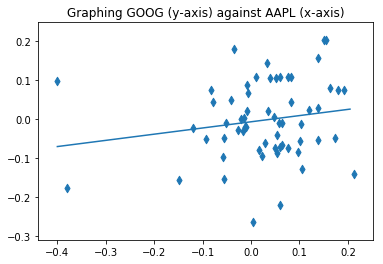

In [149]:
#scatter plot with linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(-0.399818, 0.204289)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, marker="d")
plt.title('Graphing GOOG (y-axis) against AAPL (x-axis)')
plt.plot(xfit, yfit)
plt.show()

In [150]:
#Print equation
print("Model slope: {:.4f}".format(model.coef_[0]))
print("Model intercept: {:.4f}".format(model.intercept_))

Model slope: 0.1594
Model intercept: -0.0066


In [151]:
std_AAPL = df_prices['Return_AAPL'].std()
std_AAPL

0.11170358406233492

In [152]:
var_AAPL = df_prices['Return_AAPL'].var()
var_AAPL

0.012477690692371124

In [153]:
mean_AAPL = df_prices['Return_AAPL'].mean()
mean_AAPL

0.026092535382995975

In [154]:
std_GOOG = df_prices['Return_Google'].std()
std_GOOG

0.10087209806699204

In [155]:
var_GOOG = df_prices['Return_Google'].var()
var_GOOG

0.01017518016843686

In [156]:
mean_GOOG = df_prices['Return_Google'].mean()
mean_GOOG

-0.002426902222143673

In [157]:
df_portfolio = pd.DataFrame(columns=['Proportion of AAPL', 'Portfolio standard deviation', 'Portfolio mean return'])

In [158]:
df_portfolio = df_portfolio.iloc[0:0]
for i in np.arange(-0.5, 1.6, 0.1):
    df_portfolio = df_portfolio.append({'Proportion of AAPL':round(i,1)}, ignore_index=True)
    p = df_portfolio['Proportion of AAPL']
    df_portfolio['Portfolio standard deviation'
                ] = (p ** 2 * var_AAPL + (1 - p) ** 2 * var_GOOG + 2 * p * (1 - p) * cov_portfolio).apply(np.sqrt) 
    df_portfolio['Portfolio mean return'] = p * mean_AAPL + (1 - p) * mean_GOOG

In [159]:
df_portfolio.head()

,Proportion of AAPL,Portfolio standard deviation,Portfolio mean return
0,-0.5,0.151756,-0.016687
1,-0.4,0.140399,-0.013835
2,-0.3,0.129489,-0.010983
3,-0.2,0.119149,-0.008131
4,-0.1,0.109541,-0.005279


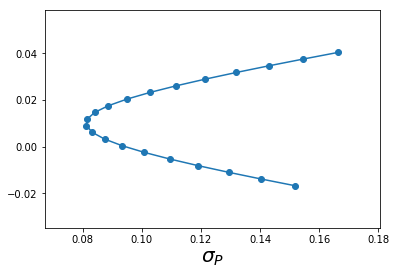

In [160]:
plt.scatter(df_portfolio['Portfolio standard deviation'], df_portfolio['Portfolio mean return'])
plt.plot(df_portfolio['Portfolio standard deviation'], df_portfolio['Portfolio mean return'])
plt.xlabel("$\sigma_P$", size=20)
plt.show()

#### 8.4: Portfolio Mean and Variance—Case of N Assets

In [161]:
var_cov_matrix = np.array([[0.10, 0.01, 0.03, 0.05],
                          [0.01, 0.30, 0.06, -0.04],
                          [0.03, 0.06, 0.40, 0.02],
                          [0.05, -0.04, 0.02, 0.50]])
portfolio_x = np.array([0.20, 0.30, 0.40, 0.10])
portfolio_y = np.array([0.20, 0.10, 0.10, 0.60])
mean_returns = np.array([[0.06],
                         [0.08],
                         [0.10],
                         [0.15]])

In [162]:
#variance portfolio x
var_x = np.dot(np.dot(portfolio_x, var_cov_matrix), np.transpose(portfolio_x))
var_x

0.12160000000000001

In [163]:
#mean portfolio x
mean_x = np.dot(portfolio_x, mean_returns)
mean_x

array([ 0.091])

In [164]:
#covariance portfolio x with portfolio y
cov_xy = np.dot(np.dot(portfolio_x, var_cov_matrix), np.transpose(portfolio_y))
cov_xy

0.071400000000000005

In [165]:
#mean portfolio y
mean_y = np.dot(portfolio_y, mean_returns)
mean_y

array([ 0.12])

In [166]:
#variance portfolio y
var_y = np.dot(np.dot(portfolio_y, var_cov_matrix), np.transpose(portfolio_y))
var_y

0.2034

In [167]:
#correlation x, y
correl_xy = cov_xy / np.sqrt(var_x * var_y)
correl_xy

0.45400010156574272

In [168]:
#x proportion
p_x = 0.30

In [169]:
#Mean portfolio return
mean_portfolio_return = p_x * mean_x + (1 - p_x) * mean_y
mean_portfolio_return

array([ 0.1113])

In [170]:
#Portfolio variance
var_portfolio = p_x ** 2 * var_x + (1 - p_x) ** 2 * var_y + 2 * p_x * (1 - p_x) * cov_xy
var_portfolio

0.140598

In [171]:
#Portfolio standard deviation
np.sqrt(var_portfolio)

0.37496399827183408

In [172]:
df_portfolio = pd.DataFrame(columns=['Proportion of x', 'Standard deviation', 'Mean'])

In [173]:
df_portfolio = df_portfolio.iloc[0:0]
for i in np.arange(-0.5, 1.5, 0.1):
    df_portfolio = df_portfolio.append({'Proportion of x':round(i,1)}, ignore_index=True)
    p = df_portfolio['Proportion of x']
    df_portfolio['Standard deviation'
                ] = (p ** 2 * var_x + (1 - p) ** 2 * var_y + 2 * p * (1 - p) * cov_xy).apply(np.sqrt) 
    df_portfolio['Mean'] = p * mean_x + (1 - p) * mean_y

In [174]:
df_portfolio.head()

,Proportion of x,Standard deviation,Mean
0,-0.5,0.617211,0.1345
1,-0.4,0.581508,0.1316
2,-0.3,0.546807,0.1287
3,-0.2,0.513311,0.1258
4,-0.1,0.481271,0.1229


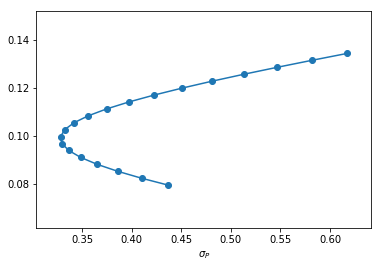

In [175]:
plt.scatter(df_portfolio['Standard deviation'], df_portfolio['Mean'])
plt.plot(df_portfolio['Standard deviation'], df_portfolio['Mean'])
plt.xlabel("$\sigma_P$")
plt.show()